# Sales Data Analysis

## 1- imprt libraries  2- clean and show data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("sales_data.csv")

In [5]:
df.head() 

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [6]:
df.count()

date        369
product     369
category    369
price       367
quantity    368
revenue     368
dtype: int64

In [7]:
df.isnull().sum()

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

In [8]:
data=df.dropna(axis=0)

In [9]:
data.isnull().sum()

date        0
product     0
category    0
price       0
quantity    0
revenue     0
dtype: int64

In [10]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
364    False
365    False
366    False
367    False
368    False
Length: 365, dtype: bool

In [11]:
data.describe()

,price,quantity,revenue
count,365.000000,365.000000,365.000000
mean,210.191781,14.520548,2050.493151
std,227.043145,8.560883,1903.190865
min,20.000000,3.000000,300.000000
25%,50.000000,8.000000,800.000000
50%,100.000000,12.000000,1200.000000
75%,200.000000,20.000000,2400.000000
max,1200.000000,50.000000,7200.000000


In [12]:
data.dtypes

date         object
product      object
category     object
price       float64
quantity    float64
revenue     float64
dtype: object

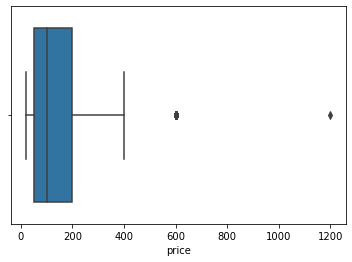

In [13]:
sns.boxplot(x=data['price'] )
plt.show()

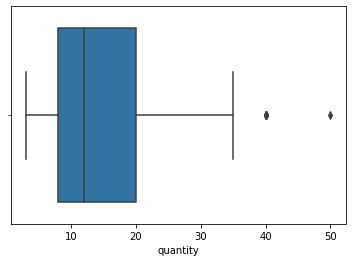

In [14]:
sns.boxplot(x=data['quantity'] )
plt.show()

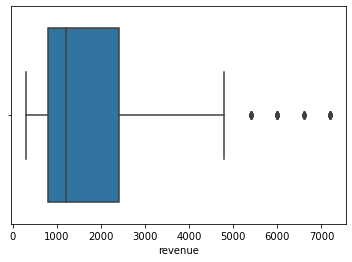

In [15]:
sns.boxplot(x=data['revenue'] )
plt.show()

### 1-What was the total revenue generated by the company over the course of the year?


In [16]:

data['date'] = pd.to_datetime(data['date'])


C:\Users\97150\AppData\Local\Temp/ipykernel_8856/277104173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])


In [17]:
data_2022 = data[data['date'].dt.year == 2022]

total_revenue_2022 = data_2022['revenue'].sum()

In [18]:
print(total_revenue_2022)

748430.0


### 2-Which product had the highest revenue? How much revenue did it generate?

In [20]:
product = data.groupby('product')['revenue'].sum()
maxprod=product.idxmax()
maxrev=product.max()

In [21]:
print(maxprod , maxrev)

Smartphone 427800.0


### 3- What was the average price of a product sold by the company?

In [23]:
avg = data['price'].mean()

In [24]:
print(avg)

210.1917808219178


### 4 - What was the total quantity of products sold by the company?

In [26]:
total = data['quantity'].sum()

In [27]:
print(total)

5300.0


### 5-Which category had the highest revenue? How much revenue did it generate?

In [29]:
category_revenue = data.groupby('category')['revenue'].sum()


In [30]:
highest_revenue_category = category_revenue.idxmax()
highest_revenue = category_revenue.max()

In [31]:
print(f"category with highest revenue is {highest_revenue_category} with revenue of ${highest_revenue:.2f}")


category with highest revenue is Electronics with revenue of $509480.00


### 6-What was the average revenue per sale?


In [34]:
total_revenue = data['revenue'].sum()

total_sales = len(data)

average_revenue_per_sale = total_revenue / total_sales



In [36]:
print(f"The average revenue per sale is ${average_revenue_per_sale:.2f}")

The average revenue per sale is $2050.49


### 7-What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)

In [38]:
data['Quarter'] = data['date'].dt.to_period('Q')
quarterly_revenue = data.groupby('Quarter')['revenue'].sum()

C:\Users\97150\AppData\Local\Temp/ipykernel_8856/1876587505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quarter'] = data['date'].dt.to_period('Q')


In [42]:
for quarter, revenue in quarterly_revenue.items():
    print(f"Quarter  {quarter } : ${revenue:.2f}")

Quarter  2022Q1 : $182100.00
Quarter  2022Q2 : $177370.00
Quarter  2022Q3 : $195430.00
Quarter  2022Q4 : $193530.00


#### understanding the average revenue per sale and segmenting revenue by quarters throughout the year aids in comprehending sales trends, product performance, and overall business health.